# Support Vector Machines Hyperparameter tuning and K-fold cross validation

The goal of the TME is to learn how to use linear and non-linear Support Vector Machines (SVM), how to tune hyperparameters, and to understand the notions of the margins and support vectors.

## Data (three simulated data sets + one real)

- Simulated data
- Diabetic Retinopathy Debrecen Data Set http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set

## Libraries

You will need to load the following packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import svm

## Analysis

Here is the description and examples of running SVM in Python:
   http://scikit-learn.org/stable/modules/svm.html
- To define a model and its parameters
    `model = svm.SVC(... parameters...)`
    and to fit a model
    `model.fit(X, Y)`
- We are in particularly interested in the parameters $C$ (the penalty term) and `kernel`.
- To find and to fix optimal parameters, we will run the 10-fold cross validation.
- We will test “linear”, “poly”, and “rbf” kernels.
    * Linear kernel: $⟨X, X′⟩$
    * Polynomial kernel: $(γ⟨X, X′⟩ + r)^d$
    * RBF kernel: $exp(−γ∥X − X′∥2)$
- Let vary the hyperparameter $C ∈ [0 : 0.1 : 10]$
- For all other parameters, we will use their default values.

1. Generate three artificial data sets (see previous TME) with the number of samples = 10 000.

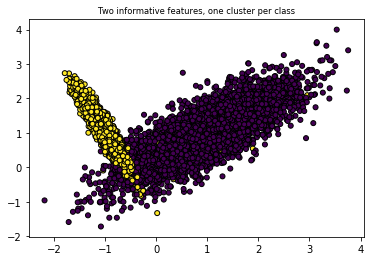

In [2]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

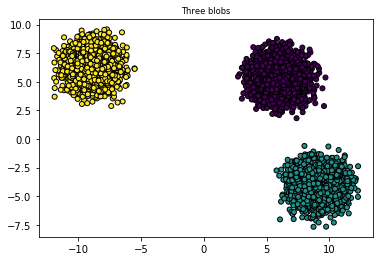

In [3]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=10000, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

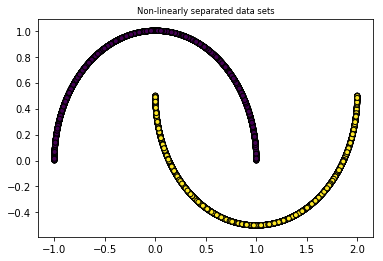

In [4]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=10000, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

2. We will fix the optimal parameters on a **validation set**.

In [5]:
X, y = X1, Y1

3. First, we will split the simulated data into 2 sets, one for training + test, and the validation set.

In [6]:
h = int(len(X)/2)
X_train_and_test, X_validation = X[:h], X[h:]
y_train_and_test, y_validation = y[:h], y[h:]


4. Implement a k-fold cross validation on the validation set. You will need to split the validation set into training and testing data. Test all the chosen kernels with all possible values of $C$, and fix the optimal $C$ and kernel based on the test accuracy of the validation set.

In [7]:
from sklearn.model_selection import KFold

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
kf = KFold(n_splits=10)
kf.get_n_splits(X_validation)

10

In [9]:
from sklearn.metrics import accuracy_score


def best_parameters_finding(X_validation, y_validation):
    HYPER_PARAMETERS = {}
    liste_des_scores_par_Cvalue=[]
    for kernel in ['linear', 'poly', 'rbf']:
        for C in [round(x, 2) for x in np.linspace(0.1, 1.0, 10)]:     
            SCORES = []
            for train_index, test_index in kf.split(X_validation):
                X_train, X_test = X_validation[train_index], X_validation[test_index]
                y_train, y_test = y_validation[train_index], y_validation[test_index]

                clf = svm.SVC(C, kernel)
                clf.fit(X_train, y_train)

                SCORES.append(accuracy_score(y_test, clf.predict(X_test)))
            print(SCORES)
            m = np.mean(SCORES)
            print("HYPER_PARAMETERS: kernel = ", kernel,"C = ", C, "-> mean accuracy score =", round(m, 4))
            HYPER_PARAMETERS[kernel, C] = m
        
            
    # https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
    print("#> Best C =", max(HYPER_PARAMETERS, key=HYPER_PARAMETERS.get))

    
best_parameters_finding(X_validation, y_validation)


[0.976, 0.962, 0.966, 0.97, 0.974, 0.966, 0.976, 0.962, 0.962, 0.982]
HYPER_PARAMETERS: kernel =  linear C =  0.1 -> mean accuracy score = 0.9696
[0.976, 0.958, 0.97, 0.97, 0.976, 0.97, 0.976, 0.962, 0.962, 0.984]
HYPER_PARAMETERS: kernel =  linear C =  0.2 -> mean accuracy score = 0.9704
[0.976, 0.956, 0.972, 0.97, 0.976, 0.97, 0.976, 0.962, 0.962, 0.982]
HYPER_PARAMETERS: kernel =  linear C =  0.3 -> mean accuracy score = 0.9702
[0.976, 0.956, 0.972, 0.97, 0.976, 0.97, 0.976, 0.962, 0.962, 0.984]
HYPER_PARAMETERS: kernel =  linear C =  0.4 -> mean accuracy score = 0.9704
[0.976, 0.956, 0.972, 0.97, 0.976, 0.97, 0.976, 0.964, 0.962, 0.982]
HYPER_PARAMETERS: kernel =  linear C =  0.5 -> mean accuracy score = 0.9704
[0.976, 0.954, 0.972, 0.968, 0.976, 0.97, 0.974, 0.964, 0.962, 0.982]
HYPER_PARAMETERS: kernel =  linear C =  0.6 -> mean accuracy score = 0.9698
[0.976, 0.954, 0.972, 0.968, 0.976, 0.97, 0.974, 0.964, 0.962, 0.982]
HYPER_PARAMETERS: kernel =  linear C =  0.7 -> mean accurac

5. Once the value of $C$ and a kernel are fixed (the ones which lead to the best performance), run the 10-fold cross validation on the data which was not used for validation.

In [10]:
# récupérer la valeur sortant de la focntion
#kernel, C = 

In [11]:
def estimation_modele(X_train_and_test, y_train_and_test, C, Kernel):

    kf = KFold(n_splits=10)
    kf.get_n_splits(X_train_and_test)
    SCORES=[]
    for train_index, test_index in kf.split(X_train_and_test):
        X_train, X_test = X_train_and_test[train_index], X_train_and_test[test_index]
        y_train, y_test = y_train_and_test[train_index], y_train_and_test[test_index]

        clf = svm.SVC(C, kernel)
        clf.fit(X_train, y_train)
        SCORES.append(accuracy_score(y_test, clf.predict(X_test)))
        moyenne_des_erreurs_a_chaque_iteration= round(np.mean(SCORES), 4)

    print('L\'estimation de l\'erreur de prédiction de notre modèle est: ', moyenne_des_erreurs_a_chaque_iteration)

kernel, C = 'rbf', 0.9
estimation_modele(X_train_and_test, y_train_and_test, C, kernel)

L'estimation de l'erreur de prédiction de notre modèle est:  0.9786


6. Run the analysis on three simulated data sets.

we already did the analysis on the first simulated data set above. Below you will find the analysis for both remaining datasets

In [12]:
# Example: https://scikit-learn.org/stable/modules/svm.html
#clf = svm.SVC(C, kernel)
#clf.fit(X, y)

#Second simulated dataset analysis

X, y = X2, Y2

h = int(len(X)/2)
X_train_and_test, X_validation = X[:h], X[h:]
y_train_and_test, y_validation = y[:h], y[h:]

best_parameters_finding(X_validation, y_validation)

kernel, C = 'linear', 0.3
estimation_modele(X_train_and_test, y_train_and_test, C, kernel)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.1 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.2 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.3 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.4 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.5 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.6 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.7 -> mean accuracy score = 1.0
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
HYPER_PARAMETERS: kernel =  linear C =  0.8 -> mean accuracy score = 1.0
[1.0, 1.

In [13]:
#Third simulated dataset analysis

X, y = X3, Y3

h = int(len(X)/2)
X_train_and_test, X_validation = X[:h], X[h:]
y_train_and_test, y_validation = y[:h], y[h:]

best_parameters_finding(X_validation, y_validation)
kernel, C = 'rbf', 0.1
estimation_modele(X_train_and_test, y_train_and_test, C, kernel)


[0.89, 0.876, 0.888, 0.862, 0.872, 0.896, 0.872, 0.902, 0.878, 0.888]
HYPER_PARAMETERS: kernel =  linear C =  0.1 -> mean accuracy score = 0.8824
[0.89, 0.88, 0.89, 0.864, 0.872, 0.898, 0.872, 0.902, 0.878, 0.89]
HYPER_PARAMETERS: kernel =  linear C =  0.2 -> mean accuracy score = 0.8836
[0.89, 0.88, 0.89, 0.866, 0.872, 0.898, 0.874, 0.902, 0.878, 0.89]
HYPER_PARAMETERS: kernel =  linear C =  0.3 -> mean accuracy score = 0.884
[0.89, 0.88, 0.89, 0.866, 0.872, 0.898, 0.876, 0.902, 0.878, 0.89]
HYPER_PARAMETERS: kernel =  linear C =  0.4 -> mean accuracy score = 0.8842
[0.89, 0.88, 0.89, 0.866, 0.872, 0.898, 0.876, 0.904, 0.878, 0.89]
HYPER_PARAMETERS: kernel =  linear C =  0.5 -> mean accuracy score = 0.8844
[0.892, 0.882, 0.89, 0.866, 0.872, 0.9, 0.876, 0.904, 0.878, 0.89]
HYPER_PARAMETERS: kernel =  linear C =  0.6 -> mean accuracy score = 0.885
[0.892, 0.882, 0.89, 0.866, 0.872, 0.9, 0.876, 0.906, 0.878, 0.89]
HYPER_PARAMETERS: kernel =  linear C =  0.7 -> mean accuracy score = 0.885

<function matplotlib.pyplot.show(*args, **kw)>

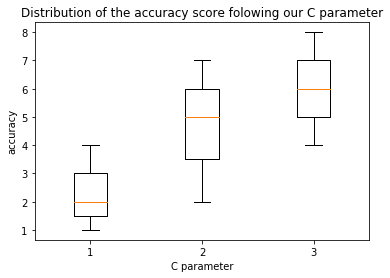

In [14]:

# TODO: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
# data_kernel= [[score pour C1], [score pour C2], ..., [scores pour C10]]


data_linear= [[1, 2, 4], [2,5,7],[4, 6,8]]
data_poly= [[1, 2, 4], [2,5,7],[4, 6,8]]
data_rbf= [[1, 2, 4], [2,5,7],[4, 6,8]]

plt.figure()
plt.boxplot(data_linear)
plt.ylabel('accuracy')
plt.xlabel('C parameter')
plt.title("Distribution of the accuracy score folowing our C parameter")
plt.show
    
    


8. For each data set, for each kernel you have an optimal $C$. Given $C$, visualize the class boundaries for three tested kernels. Here is an example (similarly to what we already did):
http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

X = X1
y = Y1

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

ValueError: The number of classes has to be greater than one; got 1

9. In SVM, the margin and the support vectors play a very important role. In a 2-dimensional case, you can visualize them. Here is an example how to plot the support vectors,
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
What is the role of the support vectors?

In [ ]:
# TODO

10. Run the same analysis on the Diabetic Retinopathy data (do not visualize anything). Tune the hyperparameters, find an optimal kernel and $C$, and boxplot the error rate.

In [16]:
# https://stackoverflow.com/questions/27264426/arff-files-with-scikit-learn
# requierement: $ pip install liac-arff
import arff
dataset = arff.load(open('messidor_features.arff'))
data = np.array(dataset['data'])

In [17]:
data

array([['1.0', '1.0', '22.0', ..., '0.100025', '1.0', '0'],
       ['1.0', '1.0', '24.0', ..., '0.144414', '0.0', '0'],
       ['1.0', '1.0', '62.0', ..., '0.128548', '0.0', '1'],
       ...,
       ['1.0', '0.0', '49.0', ..., '0.129843', '0.0', '0'],
       ['1.0', '1.0', '39.0', ..., '0.10669', '1.0', '1'],
       ['1.0', '1.0', '7.0', ..., '0.088957', '0.0', '0']], dtype='<U32')

In [ ]:
X, y = data[:, :data.shape[1]-1], data[:, data.shape[1]-1]

h = int(len(X)/2)
X_train_and_test, X_validation = X[:h], X[h:]
y_train_and_test, y_validation = y[:h], y[h:]

best_parameters_finding(X_validation, y_validation)
estimation_modele(X_train_and_test, y_train_and_test, C , kernel)

[0.8620689655172413, 0.7758620689655172, 0.7241379310344828, 0.8448275862068966, 0.7758620689655172, 0.7241379310344828, 0.7192982456140351, 0.7192982456140351, 0.7719298245614035, 0.7543859649122807]
HYPER_PARAMETERS: kernel =  linear C =  0.1 -> mean accuracy score = 0.7672
[0.8448275862068966, 0.7758620689655172, 0.7241379310344828, 0.8448275862068966, 0.7413793103448276, 0.7413793103448276, 0.7192982456140351, 0.7192982456140351, 0.7368421052631579, 0.7543859649122807]
HYPER_PARAMETERS: kernel =  linear C =  0.2 -> mean accuracy score = 0.7602
[0.8448275862068966, 0.7758620689655172, 0.7241379310344828, 0.8448275862068966, 0.7586206896551724, 0.7413793103448276, 0.7017543859649122, 0.7543859649122807, 0.7543859649122807, 0.7543859649122807]
HYPER_PARAMETERS: kernel =  linear C =  0.3 -> mean accuracy score = 0.7655
[0.8448275862068966, 0.7758620689655172, 0.7068965517241379, 0.8448275862068966, 0.7586206896551724, 0.7413793103448276, 0.6842105263157895, 0.7543859649122807, 0.754385

11. What are the optimal parameters (kernel and $C$) for the simulated data? And for the Diabetic Retinopathy data? Do you have an intuition, why some kernels are more suitable than others?

# TODO

Best parameters for simulated data 1 are rbf and 0.9 for kernel and C parameter respectively
Best parameters for simulated data 2 are linear and 0.3 for kernel and C parameter respectively
Best parameters for simulated data 3 are rbf and 0.1 for kernel and C parameter respectively

rbf seems to be the most popular kernel and this must be due to the size of the data. Indeed, RBF takes less time in computing the data so it suits better to big data as we have here. 
Moreover, this kernel is more suitable for non lineraly separable data ad this is confirmed from our results for simulated data 3.
